In [60]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

sns.set(style="darkgrid")

In [61]:
appStoreData = pd.read_csv("AppleStore.csv")
appStoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


| Колонка | Описание |
| --- | --- |
| id | App ID |
| track_name | App Name |
| size_bytes | Size (in Bytes) |
| currency | Currency Type |
| price | Price amount |
| rating_count_tot | User Rating counts (for all version) |
| rating_count_ver | User Rating counts (for current version) |
| user_rating | Average User Rating value (for all version) |
| user_rating_ver | Average User Rating value (for current version) |
| ver | Latest version code |
| cont_rating | Content Rating |
| prime_genre | Primary Genre |
| sup_devices.num | Number of supporting devices |
| ipadSc_urls.num | Number of screenshots showed for display |
| lang.num | Number of supported languages |
| vpp_lic | Vpp Device Based Licensing Enabled |

In [62]:
representativeCols = ['track_name', 'size_bytes', 'price', 'user_rating', 'prime_genre']

appStoreData[representativeCols].head()

,track_name,size_bytes,price,user_rating,prime_genre
0,PAC-MAN Premium,100788224,3.99,4.0,Games
1,Evernote - stay organized,158578688,0.00,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping
4,Bible,92774400,0.00,4.5,Reference


Есть подозрение, что первая колонки без имени и 'id' - уникальные идентификаторы записи. Если это так, тогда можно смело удалять колонку без имени и колонку id делать индексом нашего датасета.

In [63]:
totalRows = len(appStoreData.index)
idColUnique = appStoreData['id'].unique().size
unnamedColUnique = appStoreData.iloc[:,0].unique().size

print("Total rows in dataset: %d" % totalRows)
print("Unique items within 'id' column: %d" % idColUnique)
print("Unique items within unnamed column: %d" % unnamedColUnique)

Total rows in dataset: 7197
Unique items within 'id' column: 7197
Unique items within unnamed column: 7197


Видим, что кол-во уникальных записей в колонках равно общему количеству записей, следовательно обе колонки есть ни что иное, как уникальный идентификатор. Оставляем только одну.

In [64]:
appStoreData.drop(columns=[appStoreData.columns[0]], inplace = True)
appStoreData.set_index(['id'], inplace = True)
appStoreData[representativeCols].head()

,track_name,size_bytes,price,user_rating,prime_genre
id,,,,,
281656475,PAC-MAN Premium,100788224,3.99,4.0,Games
281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather
282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping
282935706,Bible,92774400,0.00,4.5,Reference


Посмотрим какие типы валют присутствую в данных:

In [65]:
appStoreData['currency'].unique()

array(['USD'], dtype=object)

Т.к. валюта только одна и колонка не содержит NaN, то смело удаляем ее из данных

In [66]:
appStoreData.drop(columns=['currency'], inplace = True)

Проанализируем данные по версиям приложений. Версии отличаются одинаковым значением *track_name* и разными значениями *ver*

In [67]:
pd.DataFrame(
    appStoreData.groupby(['track_name'])['ver'].count().sort_values(ascending=False)
).head(10)

,ver
track_name,
Mannequin Challenge,2
VR Roller Coaster,2
ｗｗｗ,1
Higher Higher!,1
Hidden Pictures by Highlights Magazine,1
Hidden World,1
Hidden my game by mom - escape room,1
Hide N Seek : Mini Multiplayer Game,1
Hide it Hillary!,1


Во всем датасете только два приложения с двумя версиями каждое. Абсолютно не информативная фича. Удаляем

In [68]:
appStoreData.drop(columns=['user_rating_ver'], inplace = True)
appStoreData.drop(columns=['rating_count_ver'], inplace = True)
appStoreData.drop(columns=['ver'], inplace = True)
# удаляем старые версии приложений
appStoreData.drop([1089824278, 1178454060], inplace = True)

### Описательные статистики

In [69]:
numericFeatures = appStoreData.select_dtypes([np.number]).columns

statsDict = {
    feature: {
        param: getattr(appStoreData[feature], param)()
        for param in ['mean', 'mode', 'median', 'min', 'max', 'std']
    }
    for feature in numericFeatures
}

print("{:<17} {:<13} {:<12} {:<12} {:<7} {:<11} {:<14} {:<12}".format(
    'Feature', 
    'Mean', 
    'Mode', 
    'Median', 
    'Min', 
    'Max', 
    'Mid-range',
    'STD')
)
print("-" * 105)
for feature in statsDict:
    print("{:<17} {:<13.2f} {:<12.2f} {:<12.2f} {:<7} {:<11} {:<14.2f} {:<12.2f}".format(
        feature, 
        statsDict[feature]['mean'], 
        statsDict[feature]['mode'][0],
        statsDict[feature]['median'], 
        statsDict[feature]['min'], 
        statsDict[feature]['max'], 
        statsDict[feature]['max'] - statsDict[feature]['min'],
        statsDict[feature]['std'])
    )

Feature           Mean          Mode         Median       Min     Max         Mid-range      STD         
---------------------------------------------------------------------------------------------------------
size_bytes        199148037.16  31624192.00  97153024.00  589824  4025969664  4025379840.00  359252734.57
price             1.73          0.00         0.00         0.0     299.99      299.99         5.83        
rating_count_tot  12896.47      0.00         300.00       0       2974676     2974676.00     75749.64    
user_rating       3.53          4.50         4.00         0.0     5.0         5.00           1.52        
sup_devices.num   37.36         37.00        37.00        9       47          38.00          3.74        
ipadSc_urls.num   3.71          5.00         5.00         0       5           5.00           1.99        
lang.num          5.44          1.00         1.00         0       75          75.00          7.92        
vpp_lic           0.99          1.00         1

### Ищем группы

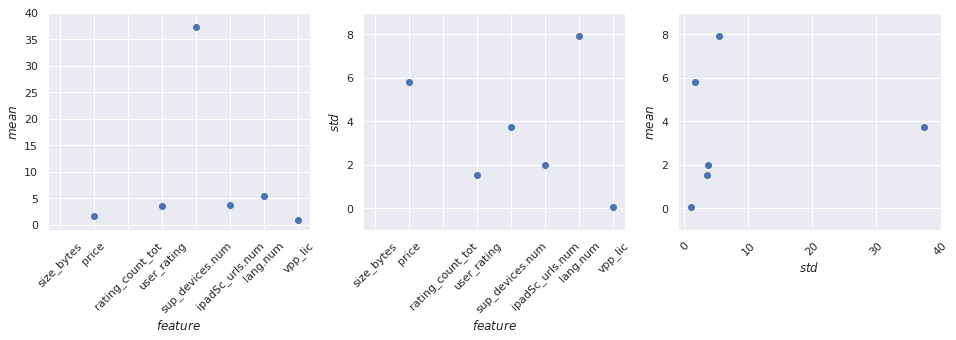

In [70]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
    
axs[0].scatter(statsDict.keys(), [statsDict[k]['mean'] for k in statsDict])
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$mean$")
axs[0].set_xlabel("$feature$")
axs[0].xaxis.set_tick_params(rotation=45)
axs[0].set_ylim(-1, 40)

axs[1].scatter(statsDict.keys(), [statsDict[k]['std'] for k in statsDict])
axs[1].set_ylabel("$std$")
axs[1].set_xlabel("$feature$")
axs[1].xaxis.set_tick_params(rotation=45)
axs[1].set_ylim(-1, 9)

axs[2].scatter([statsDict[k]['mean'] for k in statsDict], [statsDict[k]['std'] for k in statsDict])
axs[2].set_ylabel("$mean$")
axs[2].set_xlabel("$std$")
axs[2].xaxis.set_tick_params(rotation=45)
axs[2].set_xlim(-1, 40)
axs[2].set_ylim(-1, 9)

plt.show()

### Распределение приложений по категориям

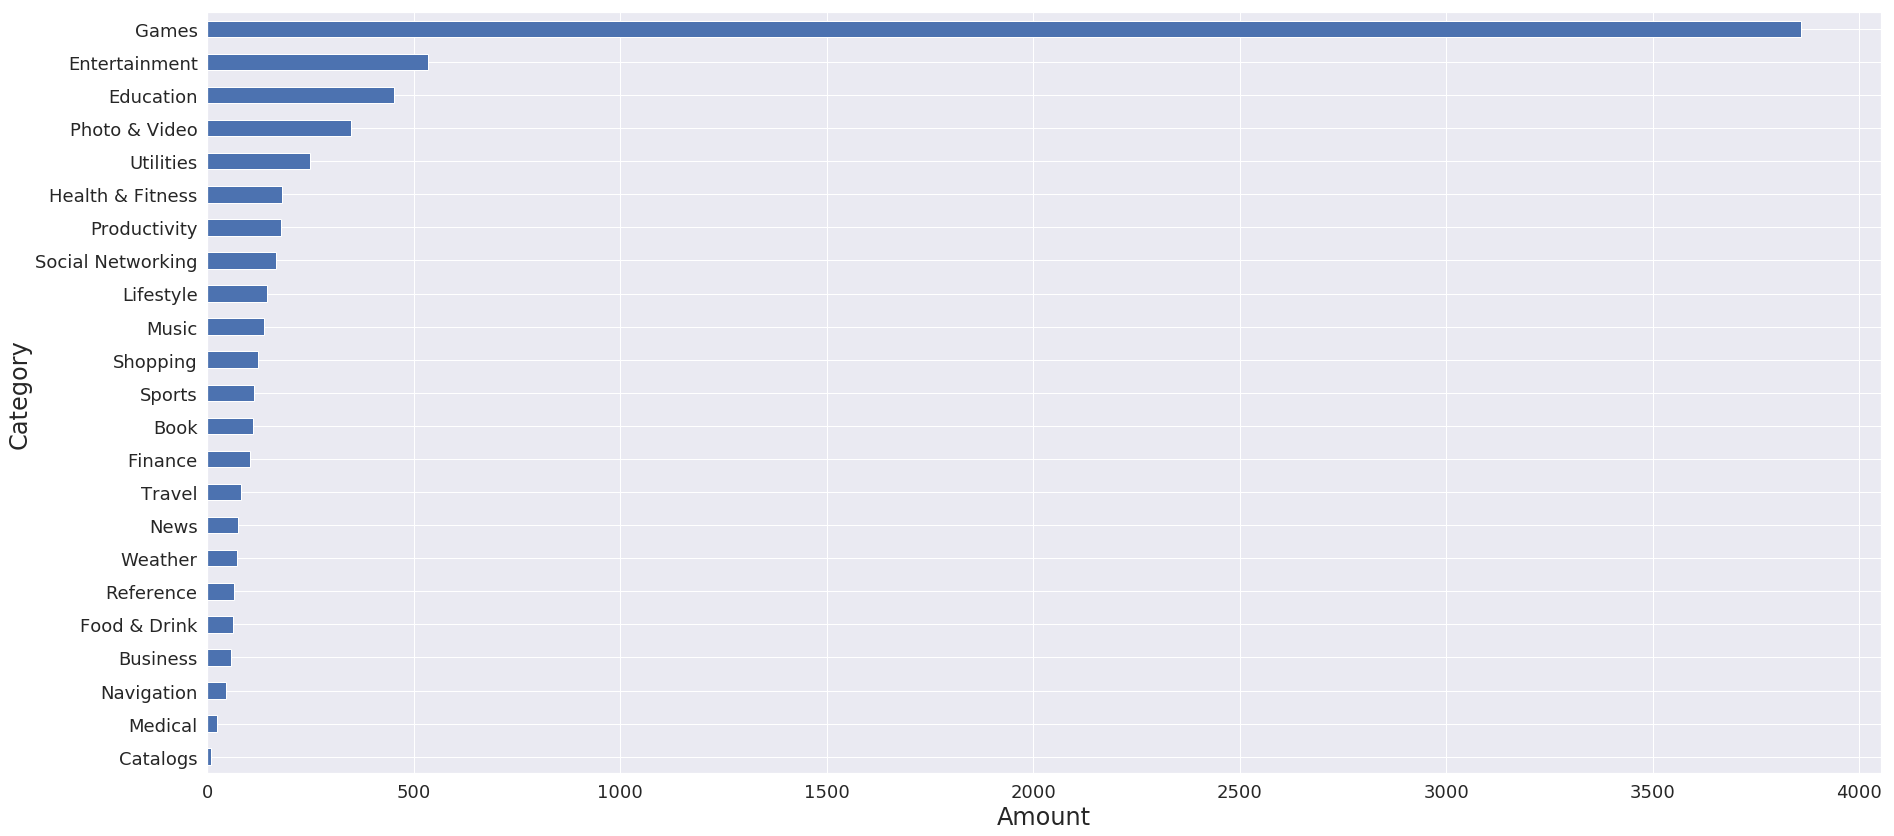

In [71]:
fig = plt.gcf()
fig.set_size_inches(30,14)
appStoreData.groupby(['prime_genre'])['track_name'].count().sort_values().plot(kind='barh', legend = False)
plt.xlabel('Amount', fontsize=24)
plt.ylabel('Category', fontsize=24)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.show()

### Анализ рейтингов

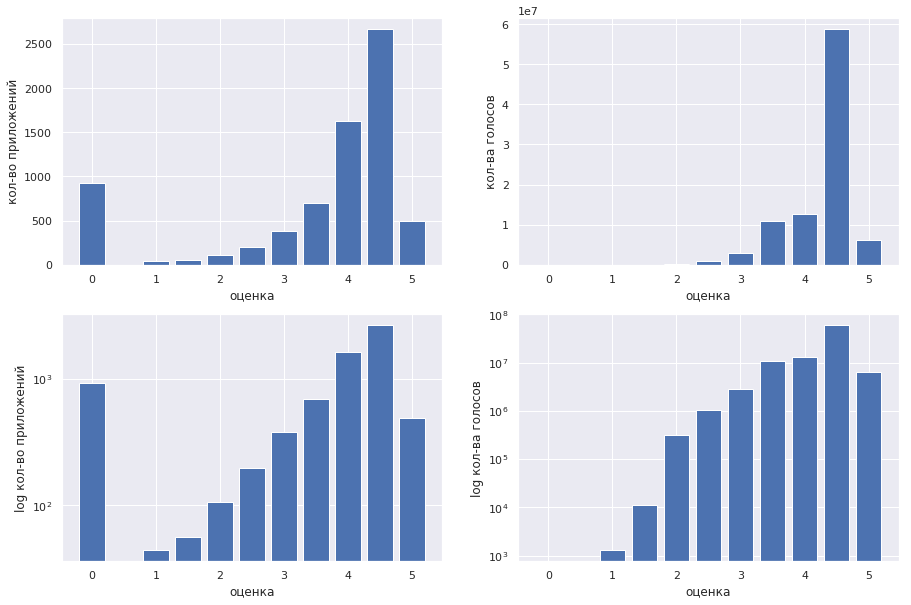

In [95]:
ratingCount = appStoreData.groupby(['user_rating'])['track_name'].count()
ratingSum = appStoreData.groupby(['user_rating'])['rating_count_tot'].sum()

fig, axs = plt.subplots(figsize=(15,10), ncols=2, nrows=2)
axs[0, 0].set_xlabel("оценка")
axs[0, 0].set_ylabel("кол-во приложений")
# axs[0].hist(appStoreData['user_rating'], 11)
axs[0, 0].bar(ratingCount.index.values, ratingCount, 0.4)

axs[0, 1].set_xlabel("оценка")
axs[0, 1].set_ylabel("кол-ва голосов")
axs[0, 1].bar(ratingSum.index.values, ratingSum, 0.4)

axs[1, 0].set_xlabel("оценка")
axs[1, 0].set_ylabel("log кол-во приложений")
axs[1, 0].bar(ratingCount.index.values, ratingCount, 0.4, log=True)

axs[1, 1].set_xlabel("оценка")
axs[1, 1].set_ylabel("log кол-ва голосов")
axs[1, 1].bar(ratingSum.index.values, ratingSum, 0.4, log=True)

plt.show()

Оценка "0" говорит о том, что приложение еще никто не оценивал. Оценку "0.5" вообще невозможно получить, т.к. мин. оценка - 1

### Зависимость пользовательского рейтинга от цены и размера приложения от кол-ва языков

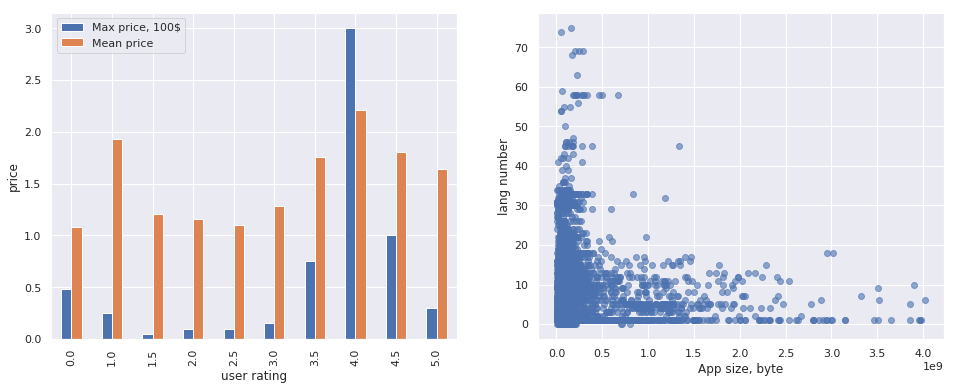

In [14]:
appStoreData.groupby(['user_rating'])['price'].sum()


fig, axs = plt.subplots(figsize=(16, 6), ncols=2)
    
pd.DataFrame({
    "Max price, 100$":appStoreData.groupby(['user_rating'])['price'].max() / 100,
    "Mean price":appStoreData.groupby(['user_rating'])['price'].mean()
}).plot(kind='bar', ax=axs[0])
axs[0].set_xlabel("user rating")
axs[0].set_ylabel("price")

axs[1].scatter(appStoreData['size_bytes'], appStoreData['lang.num'], alpha=0.6)
axs[1].set_xlabel("App size, byte")
axs[1].set_ylabel("lang number")

plt.show()


### Распределение рейтинга

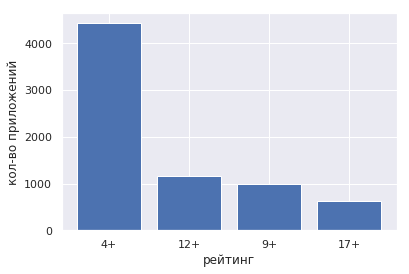

In [15]:
ratingData = appStoreData.groupby(['cont_rating'])['track_name'].count().sort_values(ascending=False)

plt.bar(
    ratingData.index.values, 
    ratingData
)
plt.xlabel('рейтинг')
plt.ylabel('кол-во приложений')
plt.show()

### Распределение категорий по кол-ву оценок

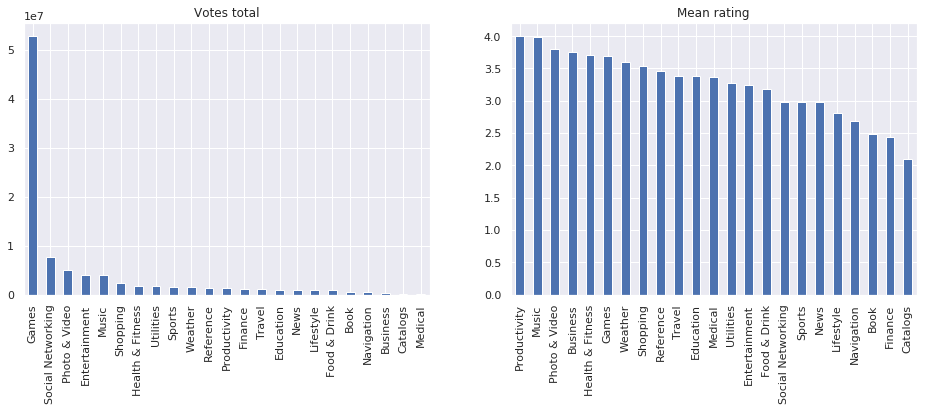

In [16]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=2)
   
appStoreData.groupby(['prime_genre'])['rating_count_tot'] \
    .sum().sort_values(ascending=False) \
    .plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_title('Votes total')

appStoreData.groupby(['prime_genre'])['user_rating'] \
    .mean().sort_values(ascending=False) \
    .plot(kind='bar', ax=axs[1]) 
axs[1].set_xlabel('')
axs[1].set_title('Mean rating')

plt.show()

### Распределение категорий по голосам среди платных и бесплатных приложений

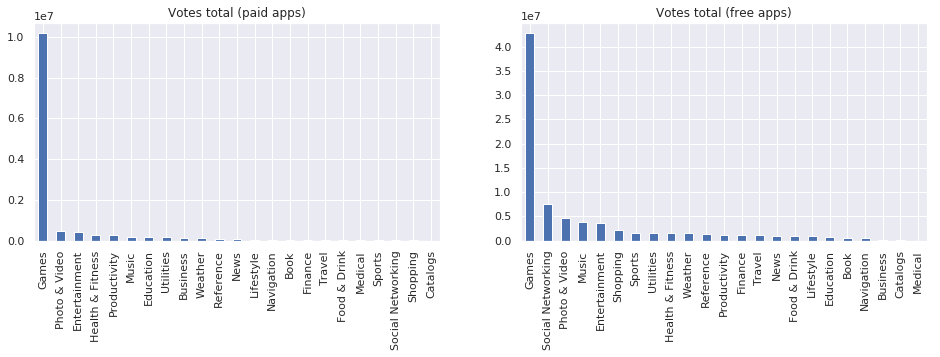

In [100]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)
   
appStoreData[appStoreData['price'] > 0].groupby(['prime_genre'])['rating_count_tot'] \
    .sum().sort_values(ascending=False) \
    .plot(kind='bar', legend = False, ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_title('Votes total (paid apps)')

appStoreData[appStoreData['price'] == 0].groupby(['prime_genre'])['rating_count_tot'] \
    .sum().sort_values(ascending=False) \
    .plot(kind='bar', legend = False, ax=axs[1])
axs[1].set_xlabel('')
axs[1].set_title('Votes total (free apps)')

plt.show()

### Распределение категорий по суммарной стоимости приложений

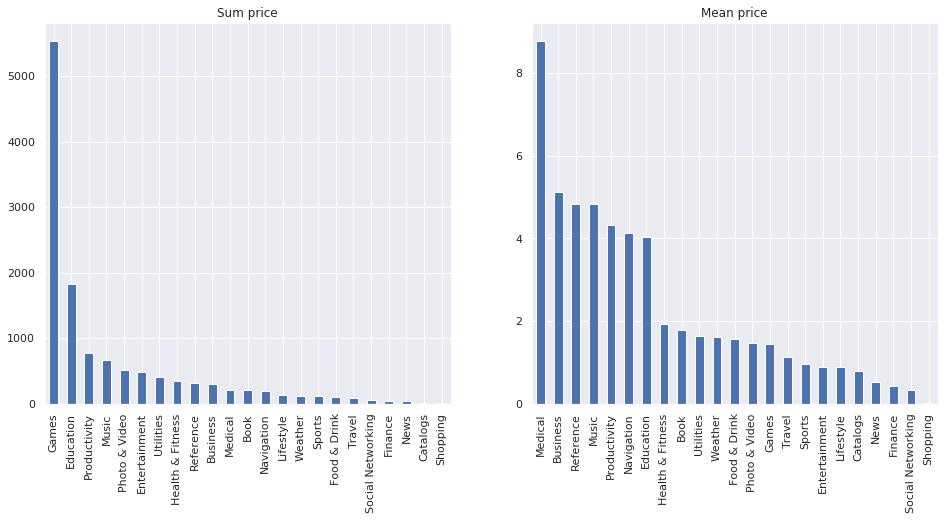

In [18]:
fig, axs = plt.subplots(figsize=(16, 7), ncols=2)
   
appStoreData.groupby(['prime_genre'])['price'].sum().sort_values(ascending=False) \
    .plot(kind='bar', legend = False, ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_title('Sum price')

axs[1].set_xlabel("Rating mean")
appStoreData.groupby(['prime_genre'])['price'].mean().sort_values(ascending=False) \
    .plot(kind='bar', legend = False, ax=axs[1]) 
axs[1].set_xlabel('')
axs[1].set_title('Mean price')

plt.show()

### Распределение групп по среднему размеру приложений

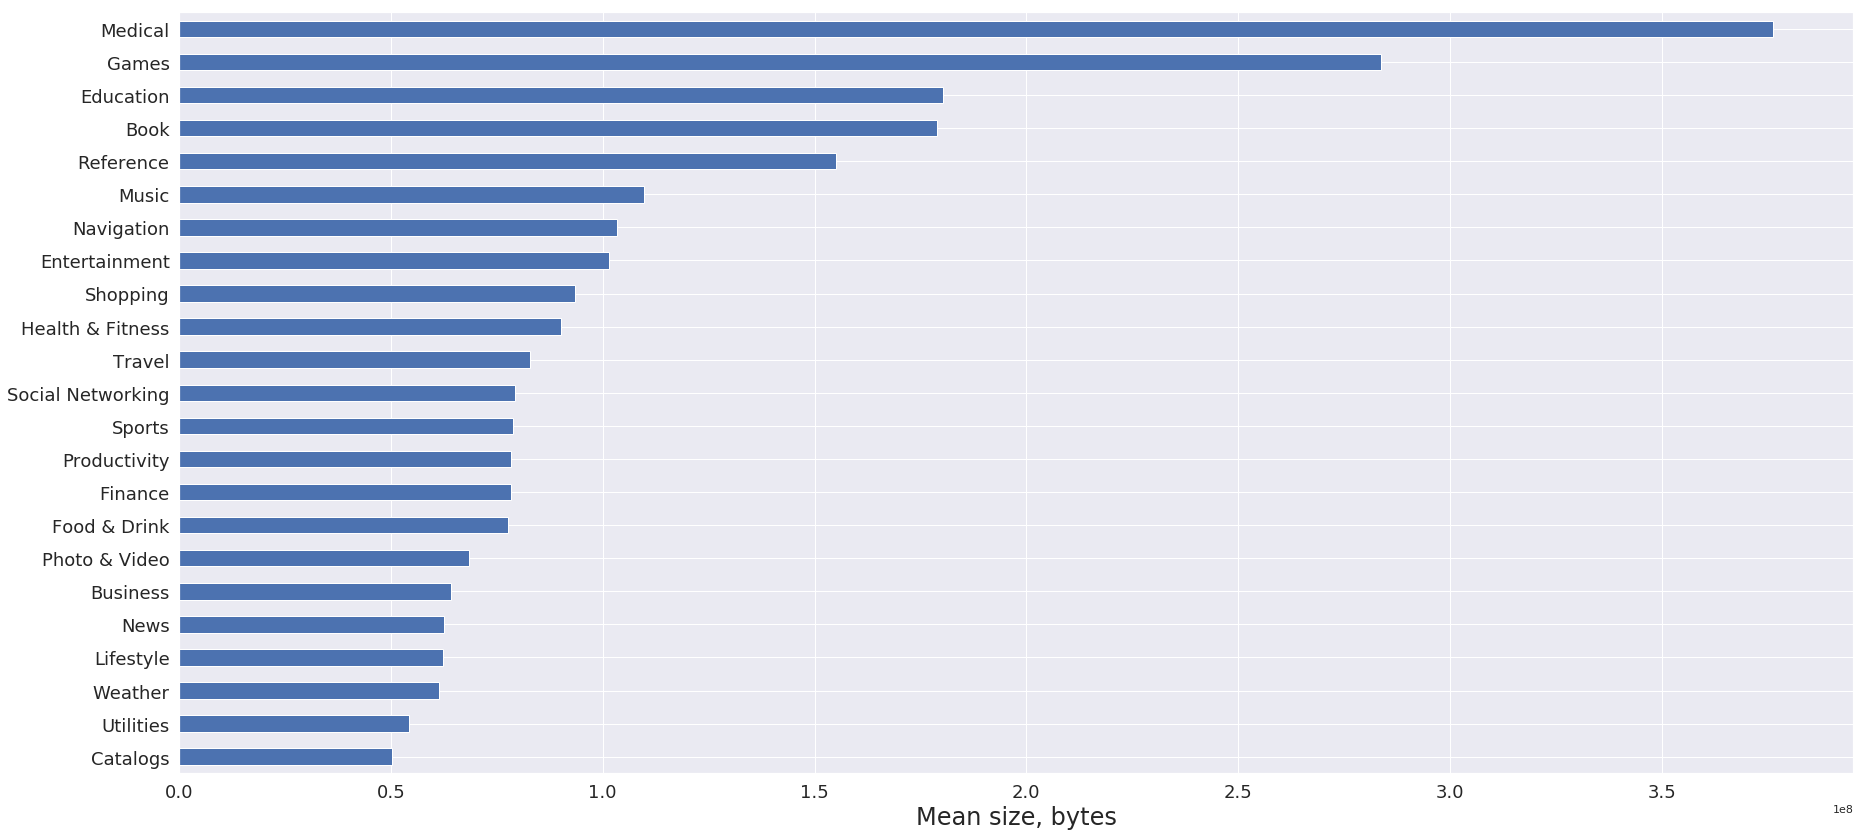

In [19]:
fig = plt.gcf()
fig.set_size_inches(30,14)
appStoreData.groupby(['prime_genre'])['size_bytes'].mean().sort_values().plot(kind='barh', legend = False)
plt.xlabel('Mean size, bytes', fontsize=24)
plt.ylabel('')
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
plt.show()